In [22]:
!pip install tensorflow

In [24]:
from tensorflow.keras.datasets import mnist 

In [25]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential

In [26]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [27]:
data = mnist.load_data()

In [28]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [29]:
import matplotlib.pyplot as plt

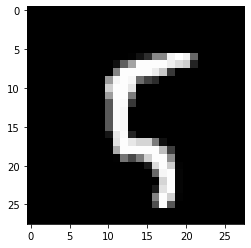

In [30]:
plt.imshow(x_train[100],cmap="gray")

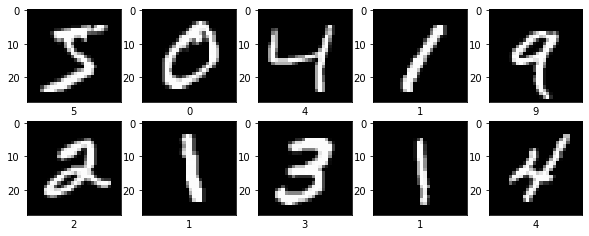

In [31]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.imshow(x_train[i],cmap="gray")
    plt.xlabel(y_train[i])

In [32]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [33]:
model = Sequential()

In [34]:
input_layer = Dense(32,input_shape = (28,28,1))

In [35]:
model.add(input_layer)

In [36]:
conv1 = Conv2D(32,kernel_size = (3,3),activation='relu')
conv2 = Conv2D(32,kernel_size = (3,3),activation='relu')

In [37]:
model.add(conv1)
model.add(conv2)

In [38]:
pool_layer = MaxPooling2D(pool_size=(2,2))
model.add(pool_layer)

In [39]:
drop_layer = Dropout(0.5)
model.add(drop_layer)

In [40]:
flat_layer = Flatten()
model.add(flat_layer)

In [43]:
output_layer = Dense(10,activation='softmax')
model.add(output_layer)

In [44]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
history = model.fit(x_train,y_train,epochs = 5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.3333 - accuracy: 0.9259 - val_loss: 0.0815 - val_accuracy: 0.9756
Epoch 2/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1143 - accuracy: 0.9651 - val_loss: 0.0580 - val_accuracy: 0.9824
Epoch 3/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0925 - accuracy: 0.9726 - val_loss: 0.0526 - val_accuracy: 0.9832
Epoch 4/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0740 - accuracy: 0.9776 - val_loss: 0.0483 - val_accuracy: 0.9855
Epoch 5/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0596 - accuracy: 0.9808 - val_loss: 0.0461 - val_accuracy: 0.9847


In [47]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print("val_loss:",val_loss)
print("val_acc:",val_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0461 - accuracy: 0.9847
val_loss: 0.046091534197330475
val_acc: 0.9847000241279602


In [60]:
import numpy as np
arr = x_train[1000].reshape(1,28,28,1)
def predicted(arr):
    print("the Image is: ")
    plt.imshow(x_train[1000],cmap="gray")
    arr_pred = model.predict(arr)
    return np.argmax(arr_pred)

the Image is: 
1/1 [==============================] - 0s 12ms/step
0


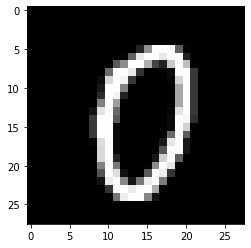

In [61]:
print(predicted(arr))